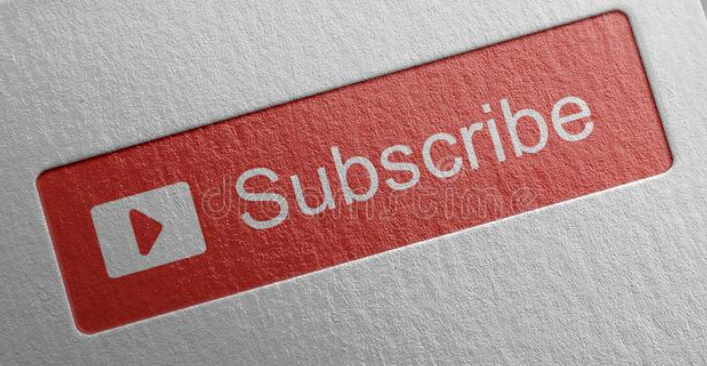

## **Importing Libray**

In [1]:
#installation
!pip install pycountry-convert

You should consider upgrading via the 'C:\ProgramData\Anaconda3\python.exe -m pip install --upgrade pip' command.


In [2]:
import os
os.listdir()

['.ipynb_checkpoints', 'DataSets', 'Insights.ipynb']

In [3]:
pwd

'E:\\DataScience\\MachineLearning\\YouTube Data Insights'

In [4]:
path ='E:\\DataScience\\MachineLearning\\YouTube Data Insights'

In [5]:
dataset =path+"\\DataSets"

In [7]:
os.listdir(dataset)

['List of most-subscribed YouTube channels (1).csv']

In [8]:
# Importing Basics libray
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
import plotly
import plotly.express as px
import plotly.io as pio
pio._templates.default ="plotly_dark"
from plotly.subplots import make_subplots
from scipy import signal
from wordcloud import WordCloud ,STOPWORDS

# To Supress Warning
import warnings
warnings.filterwarnings('ignore')

# Map Visulaization
import folium
from folium import Marker
from folium.plugins import MarkerCluster

# To make shell more attractive
from IPython.display import display

# Set Size of Charts 
plt.rcParams['figure.figsize'] =(16,8)
plt.style.use('fivethirtyeight')

In [9]:
df =pd.read_csv(dataset+"\\List of most-subscribed YouTube channels (1).csv")

In [10]:
df.head(10).style.background_gradient(cmap = 'rocket_r')

In [11]:
df.describe().style.background_gradient(cmap = 'rocket_r')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Rank                    50 non-null     int64  
 1   Name                    50 non-null     object 
 2   Brand channel           50 non-null     object 
 3   Subscribers (millions)  50 non-null     float64
 4   Primary language        50 non-null     object 
 5   Category                50 non-null     object 
 6   Country                 50 non-null     object 
dtypes: float64(1), int64(1), object(5)
memory usage: 2.9+ KB


In [13]:
#is there any row having null finally sum up those from each col.
df.isna().sum()

Rank                      0
Name                      0
Brand channel             0
Subscribers (millions)    0
Primary language          0
Category                  0
Country                   0
dtype: int64

In [14]:
df.columns

Index(['Rank', 'Name', 'Brand channel', 'Subscribers (millions)',
       'Primary language', 'Category', 'Country'],
      dtype='object')

In [15]:
# Just making commom lang.
df['Primary language']=df['Primary language'].replace('English[10][11][12]','English').replace('Hindi[13][14]','Hindi').replace('Hindi[16]','Hindi').replace('Hindi[7][8]','Hindi').replace('Hindi[9]','Hindi')

In [16]:
#unique data in each coulmns
df.nunique(axis=0)

Rank                      50
Name                      49
Brand channel              2
Subscribers (millions)    48
Primary language           6
Category                   9
Country                   16
dtype: int64

In [17]:
df['Subscribers (millions)'].nlargest(11)

0     232.0
1     150.0
2     149.0
3     124.0
4     111.0
5     106.0
6     103.0
7      92.4
8      91.9
9      91.0
10     83.6
Name: Subscribers (millions), dtype: float64

In [18]:
# Change the data type to int ..
df['Subscribers (millions)'] = df['Subscribers (millions)'].astype(int)

In [19]:
df_10=df.loc[df['Subscribers (millions)']>83]
df_10.head(10).style.background_gradient(cmap = 'rocket_r')

## **Top 10 YouTube Channels**

### STORY ~ INSIGHTS

### TOP 10 channels by highest number of subscriber

In [20]:
fig = px.bar(df_10,x=df_10['Name'],y=df_10['Subscribers (millions)'].nlargest(10),
            color=df_10['Name'],title="Top 10 YouTube Channels Which have Highest Numbers of Subscriber",template='plotly_dark')
fig.update_xaxes(title_text='YouTube Channels')
fig.update_yaxes(title_text='Subscribers (millions)')
fig.show()

### Out of top 10 channels which are belongs to brand ?

In [21]:
fig = px.bar(df_10,x=df_10['Brand channel'].value_counts().index,y=df_10['Brand channel'].value_counts(),
            color=df_10['Brand channel'].value_counts().index,title="Top 10 YouTube Channels : count of brand channels",template='plotly_dark')
fig.update_xaxes(title_text='Brand or not')
fig.update_yaxes(title_text='Count')
fig.show()

### Amongs Top 10 Channels : Category % 

In [22]:
fig = px.pie(df_10, values=df_10['Category'].value_counts(), names=df_10['Category'].value_counts().index
             , title='Amongs Top 10 Channels : Category %',hole = .65,template='plotly_dark')
fig.show()

### Amongs Top 10 Channels : Language %

In [23]:
fig = px.pie(df_10, values=df_10['Primary language'].value_counts(), names=df_10['Primary language'].value_counts().index
             , title='Amongs Top 10 Channels : Language %',hole = .65,template='plotly_dark')
fig.show()

### Amongs Top 10 Channels : Country %'

In [24]:
fig = px.pie(df_10, values=df_10['Country'].value_counts(), names=df_10['Country'].value_counts().index
             , title='Amongs Top 10 Channels : Country %',hole = .65,template='plotly_dark')
fig.show()

## Obseravation ~ 
* ###  Top 1 : T-Series Youtube channels with 232 Millon Subscribers
* ###  Among top 10 Channels - 40% channels are from US and 30% Indian
* ###  Among top 10 Channels - 70% have english language and 30% have Hindi
* ###  Among top 10 Channels - 50% ~ Entertainment catogery,20% Music
* ###  Out of top 10 channels - Most of them bleongs to brands

# **Now Let us See Big-Picture ~👀**

### Brand Presence %  

In [25]:
fig = px.pie(df, values=df['Brand channel'].value_counts(), names=df['Brand channel'].value_counts().index
             ,title='Brand Presence : %',hole =0.2,template='plotly_dark')
fig.show()

### Prevalence of the language %

In [26]:
fig = px.pie(df, values=df['Primary language'].value_counts(), names=df['Primary language'].value_counts().index
             ,title='Language : %',hole =0.35,template='plotly_dark')
fig.show()

### Popular Categories Class

In [27]:
fig = px.pie(df, values=df['Category'].value_counts(), names=df['Category'].value_counts().index
             ,title='Category : Class',hole =0.35,template='plotly_dark')
fig.show()

### Country With Count of Channel Registered

In [28]:
fig = px.bar(df,x=df['Country'].value_counts().index,y=df['Country'].value_counts(),
            color=df['Country'].value_counts().index,title="Country With Count of Channel Registered",template='plotly_dark')
fig.update_xaxes(title_text='Country')
fig.update_yaxes(title_text='Counts')
fig.show()

In [29]:
#Preparing data for Map plots
frame = { 'Country': df['Country'].value_counts().index, 'Total':df['Country'].value_counts()}
df_18 = pd.DataFrame(frame)

In [30]:
df_18.reset_index(inplace = True,drop=True)

In [31]:
df_18

Country  Total
0                           India     17
1                   United States     12
2                          Brazil      4
3                     South Korea      4
4                       Cyprus[a]      2
5                     El Salvador      1
6                       Argentina      1
7                          Russia      1
8    United States ( Puerto Rico)      1
9                          Mexico      1
10                        Romania      1
11                        Ukraine      1
12                         Canada      1
13                 United Kingdom      1
14                          Chile      1
15                         Sweden      1

In [32]:
df_18.info()
# Country Columns in obj need to convt.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Country  16 non-null     object
 1   Total    16 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 384.0+ bytes


In [33]:
#Converting object columns to string
df_18['Country'] = df_18['Country'].astype('string')

In [34]:
df_18.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Country  16 non-null     string
 1   Total    16 non-null     int64 
dtypes: int64(1), string(1)
memory usage: 384.0 bytes


In [38]:
#function to convert to alpah3 country codes and continents
from pycountry_convert import  country_name_to_country_alpha3
from pycountry_convert import  country_name_to_country_alpha2
from pycountry_convert import  country_alpha2_to_continent_code

In [39]:
df_18['Country']

0                             India
1                     United States
2                            Brazil
3                       South Korea
4                         Cyprus[a]
5                       El Salvador
6                         Argentina
7                            Russia
8      United States ( Puerto Rico)
9                            Mexico
10                          Romania
11                          Ukraine
12                           Canada
13                   United Kingdom
14                            Chile
15                           Sweden
Name: Country, dtype: string

In [40]:
lst=[]
for cnt in df_18['Country']:
    lst.append(cnt.replace('\xa0', '')) 
lst

['India',
 'United States',
 'Brazil',
 'South Korea',
 'Cyprus[a]',
 'El Salvador',
 'Argentina',
 'Russia',
 'United States(Puerto Rico)',
 'Mexico',
 'Romania',
 'Ukraine',
 'Canada',
 'United Kingdom',
 'Chile',
 'Sweden']

In [41]:
cd=[]
cn=[]
for country in lst:
    #print(country)
    try:
        code =country_name_to_country_alpha3(country)
    except:
        code ='Unknown'
    try:
        code2 =country_name_to_country_alpha2(country)
    except:
        code2 ='Unknown'
    try:
       code1= country_alpha2_to_continent_code(code2)
    except:
        code1 ='Unknown'
        
    cd.append(code)
    cn.append(code1)

In [42]:
cd =pd.Series(cd)
cn=pd.Series(cn)

In [43]:
df_18['CountryCode'] = cd
df_18['ContinentCode'] = cn


In [44]:
df_18

Country  Total CountryCode ContinentCode
0                           India     17         IND            AS
1                   United States     12         USA            NA
2                          Brazil      4         BRA            SA
3                     South Korea      4         KOR            AS
4                       Cyprus[a]      2     Unknown       Unknown
5                     El Salvador      1         SLV            NA
6                       Argentina      1         ARG            SA
7                          Russia      1         RUS            EU
8    United States ( Puerto Rico)      1     Unknown       Unknown
9                          Mexico      1         MEX            NA
10                        Romania      1         ROU            EU
11                        Ukraine      1         UKR            EU
12                         Canada      1         CAN            NA
13                 United Kingdom      1         GBR            EU
14                          Chile      1         CHL            SA
15                         Sweden      1         SWE            EU

### Distribution of Registered YouTube Channels using Bubble Maps

In [45]:
fig = px.scatter_geo(df_18, locations="CountryCode", 
                     color="Total",
                     hover_name="Country", 
                     size="Total",
                     title = 'Distribution of Registered YouTube Channels using Bubble Maps',
                     projection="natural earth",
                     color_continuous_scale =px.colors.sequential.Rainbow,
                     template='plotly_dark'
                    )
fig.show()

In [46]:
fig = px.choropleth(df_18,
                    locations = "CountryCode",
                    color = "Total",
                    hover_name = "Country",
                    color_continuous_scale =px.colors.sequential.Rainbow,
                    projection = 'orthographic',
                    title = 'Distribution of Registerd Youtube Channels in World Map',
                    height = 600,
                    width = 1000,
                    template='plotly_dark'
                   )
fig.update_geos(lataxis_showgrid = True,
                lonaxis_showgrid = True,
                showcountries = True,
               )

fig.update_geos(lataxis = {'gridcolor':'#222222'},
                lonaxis = {'gridcolor':'#222222'},
               )
fig.show()


In [47]:
df_18['ContinentCode'].value_counts()

EU         5
NA         4
SA         3
AS         2
Unknown    2
Name: ContinentCode, dtype: int64

In [48]:
fig = px.bar(df_18,x=df_18['ContinentCode'].value_counts().index,y=df_18['ContinentCode'].value_counts(),
            color=df_18['ContinentCode'].value_counts().index,title="continent Wise YouTube Channels",template='plotly_dark')
fig.update_xaxes(title_text='continent')
fig.update_yaxes(title_text='Count')
fig.show()

In [50]:
## Co-relations
import phik 
from phik.report import plot_correlation_matrix
from phik import report

In [51]:
phik_overview= df.phik_matrix()

interval columns not set, guessing: ['Rank', 'Subscribers (millions)']


In [52]:
phik_overview.style.background_gradient(cmap = 'rocket_r')

## Obseravations ~
![](https://thumbs.dreamstime.com/b/youtube-logo-note-paper-pinned-corkboard-45775903.jpg)


> ## **! Thanks EveryOne I hope you enjoyed this notebook , Just Let me know if you have any feedback ,will HAPPY to See your FeedBacks ..~👀**

> ## **If you enjoyed just upvote the kernal and share with those who likes these stuff..**

In [ ]:
# Author ~ Saurabh Kumar..........xxxxxxxxxxxxxxxxxxxxxxxxx